# Sweet Cakes Prediction Project, 2020

#### This project aims at buiding a model using Support Vector Machine(SVM) to differntiate between Muffins and Cupcakes. 

In [2]:
#import libraries for data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('recipes_muffins_cupcakes.csv')
df.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [8]:
group_type = df.groupby('Type').mean()
group_type.head()

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
Type,,,,,,,,
Cupcake,37.8,14.6,22.6,13.7,8.9,1.2,0.8,0.0
Muffin,50.0,22.5,11.6,8.3,5.5,1.4,0.2,0.0


In [20]:
group_type = group_type.reset_index()

In [10]:
#plt.bar(df.Type, df.drop('Type', axis=1))

In [25]:
df_drop = group_type.drop('Type', axis='columns').head()
df_drop

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,37.8,14.6,22.6,13.7,8.9,1.2,0.8,0.0
1,50.0,22.5,11.6,8.3,5.5,1.4,0.2,0.0


In [30]:
df_drop.iloc[0,0] 

37.8

In [37]:
difference = []
for i in range(len(df_drop.columns)):
    #print (i)
    diff = df_drop.iloc[1,i] - df_drop.iloc[0,i]
    difference.append(diff)

print(difference)    

[12.200000000000003, 7.9, -11.000000000000002, -5.399999999999999, -3.4000000000000004, 0.19999999999999996, -0.6000000000000001, 0.0]


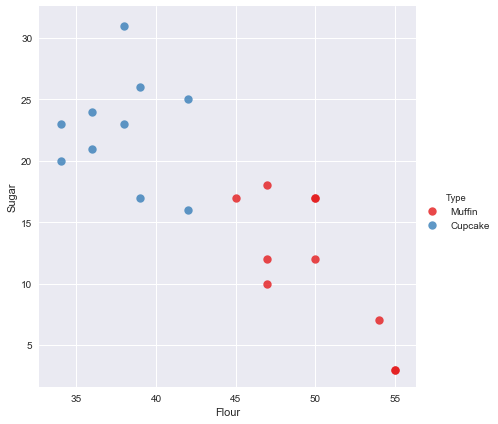

In [19]:
sns.lmplot(x='Flour', y='Sugar',data=df,height=6, palette='Set1', fit_reg=False, hue='Type', scatter_kws={'s':70}, aspect=1)

plt.style.use('seaborn')

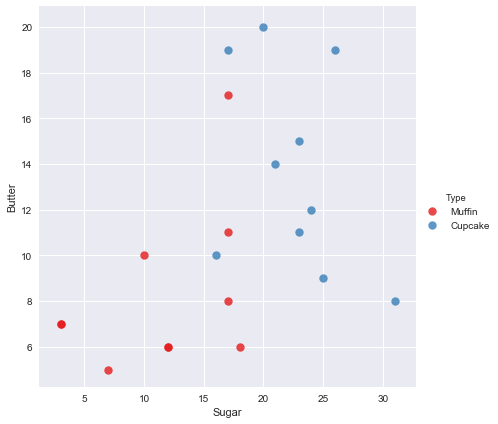

In [17]:
sns.lmplot(x='Sugar', y='Butter',data=df,height=6, palette='Set1', fit_reg=False, hue='Type', scatter_kws={'s':70}, aspect=1)
plt.style.use('seaborn')

In [18]:
#plt.scatter(df.Sugar, df.Butter)

In [22]:
Type_code = pd.factorize(df.Type)[0]

In [23]:
df['Type_code'] = Type_code
df.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt,Type_code
0,Muffin,55,28,3,7,5,2,0,0,0
1,Muffin,47,24,12,6,9,1,0,0,0
2,Muffin,47,23,18,6,4,1,0,0,0
3,Muffin,45,11,17,17,8,1,0,0,0
4,Muffin,50,25,12,6,5,2,1,0,0


In [25]:
df0 = df[df['Type_code'] == 0] #for muffin
df1 = df[df['Type_code'] == 1] #for cupcakes

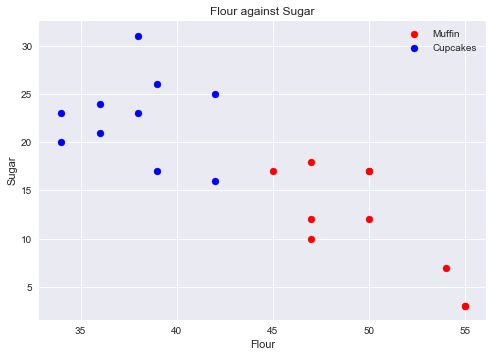

In [26]:
plt.scatter(df0['Flour'], df0['Sugar'], color='red', label='Muffin')
plt.scatter(df1['Flour'], df1['Sugar'], color='blue', label='Cupcakes')

plt.xlabel('Flour')
plt.ylabel('Sugar')
plt.title('Flour against Sugar')

plt.legend()

#### Flour was considered to be of equal type, other things being equal. So, Butter and Sugar was considered as the major determining features

### Build the model

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [58]:
#set the independent and dependent features
X = df[['Butter','Sugar']]
y = df['Type_code']

In [59]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
#instantiate SVC
model = SVC( gamma='auto')

In [61]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
model.score(X_test, y_test)

0.5

In [63]:
#model.coef_[0]

Model Optimization

C optimization

Text(0.5, 1.0, 'Score against C values')

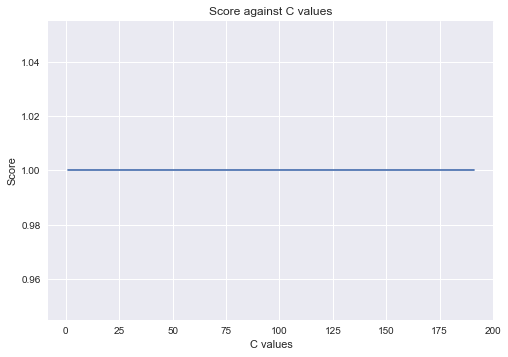

In [66]:
c_values = np.arange(1,200,10)
score = [ ]
for c in c_values:
    model1 = SVC(C=c, gamma='scale')
    model1.fit(X_train, y_train)
    score.append(model1.score(X_test,y_test))
    
plt.plot(c_values, score)
plt.xlabel('C values')
plt.ylabel('Score')
plt.title('Score against C values')

Text(0.5, 1.0, 'Score against C values')

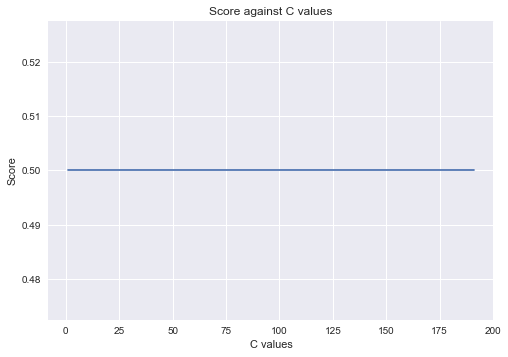

In [67]:
#when gamma is auto
c_values = np.arange(1,200,10)
score = [ ]
for c in c_values:
    model1 = SVC(C=c, gamma='auto')
    model1.fit(X_train, y_train)
    score.append(model1.score(X_test,y_test))


plt.plot(c_values, score)
plt.xlabel('C values')
plt.ylabel('Score')
plt.title('Score against C values')

Optimization for gamma values

Text(0.5, 1.0, 'gamma values against score values')

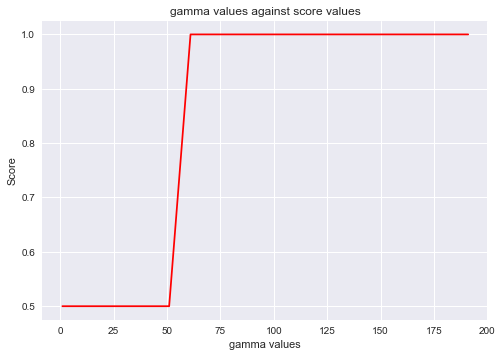

In [69]:
gammas = np.arange(1,200,10)
score = [ ]
for gamma in gammas:
    model2 = SVC(C=100, gamma=gamma)
    model2.fit(X_train, y_train)
    score.append(model2.score(X_test,y_test))
    
plt.plot(gammas, score, color='red')
plt.xlabel('gamma values')
plt.ylabel('Score')
plt.title('gamma values against score values')

A gamma value >60 is best

Optimization for kernels

Accuracy is  1.0 for linear
Accuracy is  0.75 for poly
Accuracy is  1.0 for rbf
Accuracy is  0.0 for sigmoid


Text(0.5, 1.0, 'Score against Kernel values')

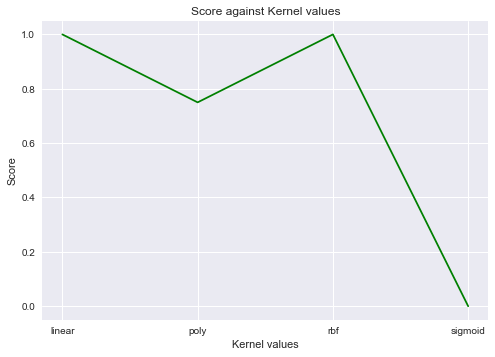

In [70]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
score = []
for kernel in kernels:
    model3 = SVC(C=100, gamma='scale', kernel=kernel)
    model3.fit(X_train, y_train)
    accuracy = model3.score(X_test,y_test)
    print('Accuracy is ',accuracy, 'for', kernel)
    score.append(accuracy)
    #print('Accuracy is ',score, 'for', kernel)
    
plt.plot(kernels, score, color='green')
plt.xlabel('Kernel values')
plt.ylabel('Score')
plt.title('Score against Kernel values')

Kernel values 'linear' or 'rbf' is best for the model 

#### Final model with optimized options

In [71]:
#instantiate the model
final_model = SVC(C=100, gamma=100, kernel='linear')

In [72]:
#train the final model
final_model.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
#check the accuracy
final_model.score(X_test, y_test)

1.0

Making Predictions

In [77]:
def predicted_type(result):
    if result == 1:
        print('You have made a Cupcake')
    else:
        print('You have made a Muffin')

In [82]:
prediction = final_model.predict([[10, 12]])

In [83]:
predicted_type(prediction)

You have made a Muffin


#### Using SVC linear

In [128]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
scaler2 = StandardScaler()

In [85]:
from sklearn.svm import LinearSVC

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
svc = LinearSVC()

In [97]:
svc.fit(X_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [98]:
svc.score(X_test, y_test)

0.75

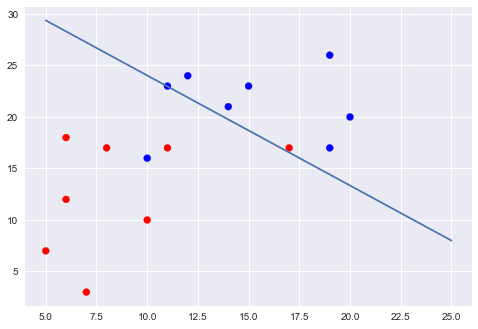

In [164]:
#plot the hyperplane
color = ['red' if c == 0 else 'blue' for c in list(y_train)]
label = ['Muffin' if c == 0 else 'Cupcake' for c in list(y_train)]

w = svc.coef_[0] #coefficients
a = -w[0] / w[1] #slop
xx = np.linspace(5, 25)
yy = a * xx - (svc.intercept_[0]) / w[1]

plt.scatter(X_train[['Butter']], X_train[['Sugar']], color=color)
plt.plot(xx, yy)
plt.show()


In [148]:
yy

array([32.57972418, 32.18718505, 31.79464591, 31.40210678, 31.00956764,
       30.61702851, 30.22448938, 29.83195024, 29.43941111, 29.04687197,
       28.65433284, 28.26179371, 27.86925457, 27.47671544, 27.0841763 ,
       26.69163717, 26.29909803, 25.9065589 , 25.51401977, 25.12148063,
       24.7289415 , 24.33640236, 23.94386323, 23.5513241 , 23.15878496,
       22.76624583, 22.37370669, 21.98116756, 21.58862843, 21.19608929,
       20.80355016, 20.41101102, 20.01847189, 19.62593276, 19.23339362,
       18.84085449, 18.44831535, 18.05577622, 17.66323709, 17.27069795,
       16.87815882, 16.48561968, 16.09308055, 15.70054141, 15.30800228,
       14.91546315, 14.52292401, 14.13038488, 13.73784574, 13.34530661])

In [171]:
svc.predict(X_test)

array([0, 1, 0, 0], dtype=int64)

In [169]:
X_test

,Butter,Sugar
0,7,3
17,8,31
15,9,25
1,6,12
